In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8efa331875a8f548085c7211e02c284f


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | vestmannaeyjar
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | baker city
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | oktyabrskoye
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of 

City not found. Skipping...
Processing Record 39 of Set 4 | fort morgan
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | killybegs
Processing Record 43 of Set 4 | juba
Processing Record 44 of Set 4 | tromso
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | colares
Processing Record 47 of Set 4 | cedar city
Processing Record 48 of Set 4 | woerden
Processing Record 49 of Set 4 | ust-maya
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | walvis bay
Processing Record 3 of Set 5 | labuhan
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | palmaner
Processing Record 6 of Set 5 | da nang
Processing Record 7 of Set 5 | ciudad bolivar
Processing Record 8 of Set 5 | goundam
Processing Record 9 of Set 5 | saint-philippe
Processing Record 10 of Set 5 | goma
Processing Record 11 of Set 5 | luderitz
Processing Record 12

City not found. Skipping...
Processing Record 32 of Set 8 | batemans bay
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | vilhena
Processing Record 35 of Set 8 | villazon
Processing Record 36 of Set 8 | lagoa
Processing Record 37 of Set 8 | alugan
Processing Record 38 of Set 8 | zhangye
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 41 of Set 8 | adre
Processing Record 42 of Set 8 | rottingdean
Processing Record 43 of Set 8 | horsham
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | aginskoye
Processing Record 46 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 47 of Set 8 | nanortalik
Processing Record 48 of Set 8 | longyearbyen
Processing Record 49 of Set 8 | ozark
Processing Record 50 of Set 8 | cumpas
Processing Record 1 of Set 9 | yulara
Processing Record 2 of Set 9 | yagodnoye
Processing Record 3 of Set 9 | hovd
Processing Record 

Processing Record 15 of Set 12 | abilene
Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | sawtell
Processing Record 18 of Set 12 | spiridonovka
Processing Record 19 of Set 12 | tuatapere
Processing Record 20 of Set 12 | asayita
City not found. Skipping...
Processing Record 21 of Set 12 | karpuninskiy
City not found. Skipping...
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | piterka
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | hastings
Processing Record 26 of Set 12 | warqla
City not found. Skipping...
Processing Record 27 of Set 12 | batagay
Processing Record 28 of Set 12 | ankpa
Processing Record 29 of Set 12 | taiyuan
Processing Record 30 of Set 12 | vizinga
Processing Record 31 of Set 12 | nicolas bravo
Processing Record 32 of Set 12 | chiriguana
Processing Record 33 of Set 12 | tokonou
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of S

In [18]:
len(city_data)

569

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.77,76,11,3.94,PF,2021-03-04 18:40:18
1,Egvekinot,66.3167,-179.1667,2.16,96,100,32.68,RU,2021-03-04 18:40:19
2,Punta Arenas,-53.1500,-70.9167,64.40,27,0,24.16,CL,2021-03-04 18:37:05
3,Fairbanks,64.8378,-147.7164,-2.99,77,75,2.51,US,2021-03-04 18:40:19
4,Ribeira Grande,38.5167,-28.7000,62.60,72,20,6.91,PT,2021-03-04 18:35:39
5,Vardo,70.3705,31.1107,24.80,74,75,16.11,NO,2021-03-04 18:35:58
6,Vestmannaeyjar,63.4427,-20.2734,41.00,81,75,6.91,IS,2021-03-04 18:40:20
7,Atuona,-9.8000,-139.0333,80.13,71,4,12.80,PF,2021-03-04 18:40:20
8,Tuktoyaktuk,69.4541,-133.0374,-23.80,76,20,9.22,CA,2021-03-04 18:40:20
9,Cape Town,-33.9258,18.4232,69.01,56,20,14.97,ZA,2021-03-04 18:40:20


In [13]:
# reorder the columns for the df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_weather_df = city_data_df[new_column_order]

city_weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-04 18:40:18,-23.1203,-134.9692,79.77,76,11,3.94
1,Egvekinot,RU,2021-03-04 18:40:19,66.3167,-179.1667,2.16,96,100,32.68
2,Punta Arenas,CL,2021-03-04 18:37:05,-53.1500,-70.9167,64.40,27,0,24.16
3,Fairbanks,US,2021-03-04 18:40:19,64.8378,-147.7164,-2.99,77,75,2.51
4,Ribeira Grande,PT,2021-03-04 18:35:39,38.5167,-28.7000,62.60,72,20,6.91
...,...,...,...,...,...,...,...,...,...
564,Ucluelet,CA,2021-03-04 18:40:56,48.9329,-125.5528,45.00,87,90,16.11
565,Svay Rieng,KH,2021-03-04 18:43:09,11.0879,105.7993,77.50,66,0,14.54
566,Vryburg,ZA,2021-03-04 18:43:09,-26.9566,24.7284,72.01,35,1,4.29
567,Atambua,ID,2021-03-04 18:43:10,-9.1061,124.8925,73.47,88,8,1.61


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

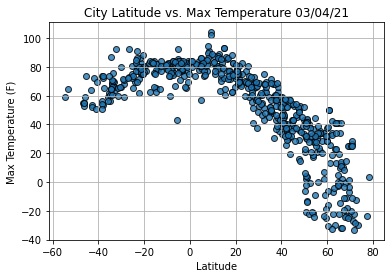

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

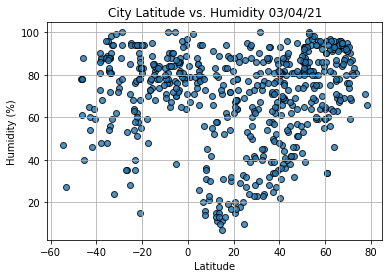

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

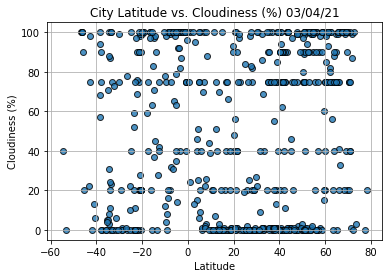

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

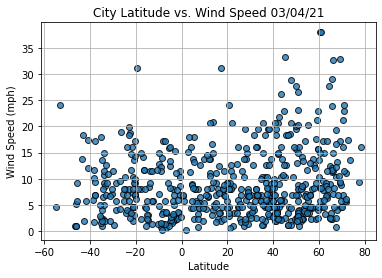

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()